In [1]:
import os
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.dirname(sys.path[0]))

In [21]:
import scripts.constants as con
from scripts.plotter import Plotter
from scripts_old.properties.ovito_procedures import OvitoProcessor

In [22]:
def calculate_rdf(positions):
    cell_dimensions = np.array([12.25, 12.25, 12.25])
    radii, rdf = OvitoProcessor(
        positions=positions, 
        cell_dimensions=cell_dimensions,
    ).get_rdf()
    return radii, rdf

In [23]:
def get_rdf_arrays(positions):
    radii, rdf = calculate_rdf(positions)
    size = obs_rdf.size
    return radii[:size], rdf[:size]

In [24]:
def mse(obs, exp):
    return np.sum((obs - exp) ** 2)

In [25]:
CURRENT_DATA_NORMAL = '2021-09-24_prepared_1.3_normal'
PATH_TO_CURRENT_DATA_NORMAL = os.path.join(con.PATH_TO_DATA, CURRENT_DATA_NORMAL)
PATH_TO_PLOTS = os.path.join(con.PATH_TO_PLOTS, CURRENT_DATA_NORMAL)

PATH_TO_CURRENT_DATA_NORMAL

'C:\\albert\\git_reps\\molecular_dynamics\\data\\2021-09-24_prepared_1.3_normal'

In [26]:
samples = np.load(os.path.join(PATH_TO_CURRENT_DATA_NORMAL, 'samples.npy'))
targets = np.load(os.path.join(PATH_TO_CURRENT_DATA_NORMAL, 'targets_pbc.npy'))
optimized_hj = np.load(os.path.join(PATH_TO_CURRENT_DATA_NORMAL, 'optimized_hj.npy'))
optimized_hj_rmo = np.load(os.path.join(PATH_TO_CURRENT_DATA_NORMAL, 'optimized_hj_rmo.npy'))
optimized_rmo = np.load(os.path.join(PATH_TO_CURRENT_DATA_NORMAL, 'optimized_rmo.npy'))

samples.shape, targets.shape, optimized_hj.shape, optimized_hj_rmo.shape, optimized_rmo.shape

((2464, 612), (2464, 1372, 3), (1372, 3), (1372, 3), (1372, 3))

In [27]:
i = 1
obs_rdf_hj = samples[i]
initial_positions = targets[-i]
obs_rdf = calculate_rdf(targets[i])[1]
initial_positions.shape

(1372, 3)

In [28]:
radii, initial_rdf = get_rdf_arrays(initial_positions)
radii, rdf_hj = get_rdf_arrays(optimized_hj)
radii, rdf_hj_rmo = get_rdf_arrays(optimized_hj_rmo)
radii, rdf_rmo = get_rdf_arrays(optimized_rmo)

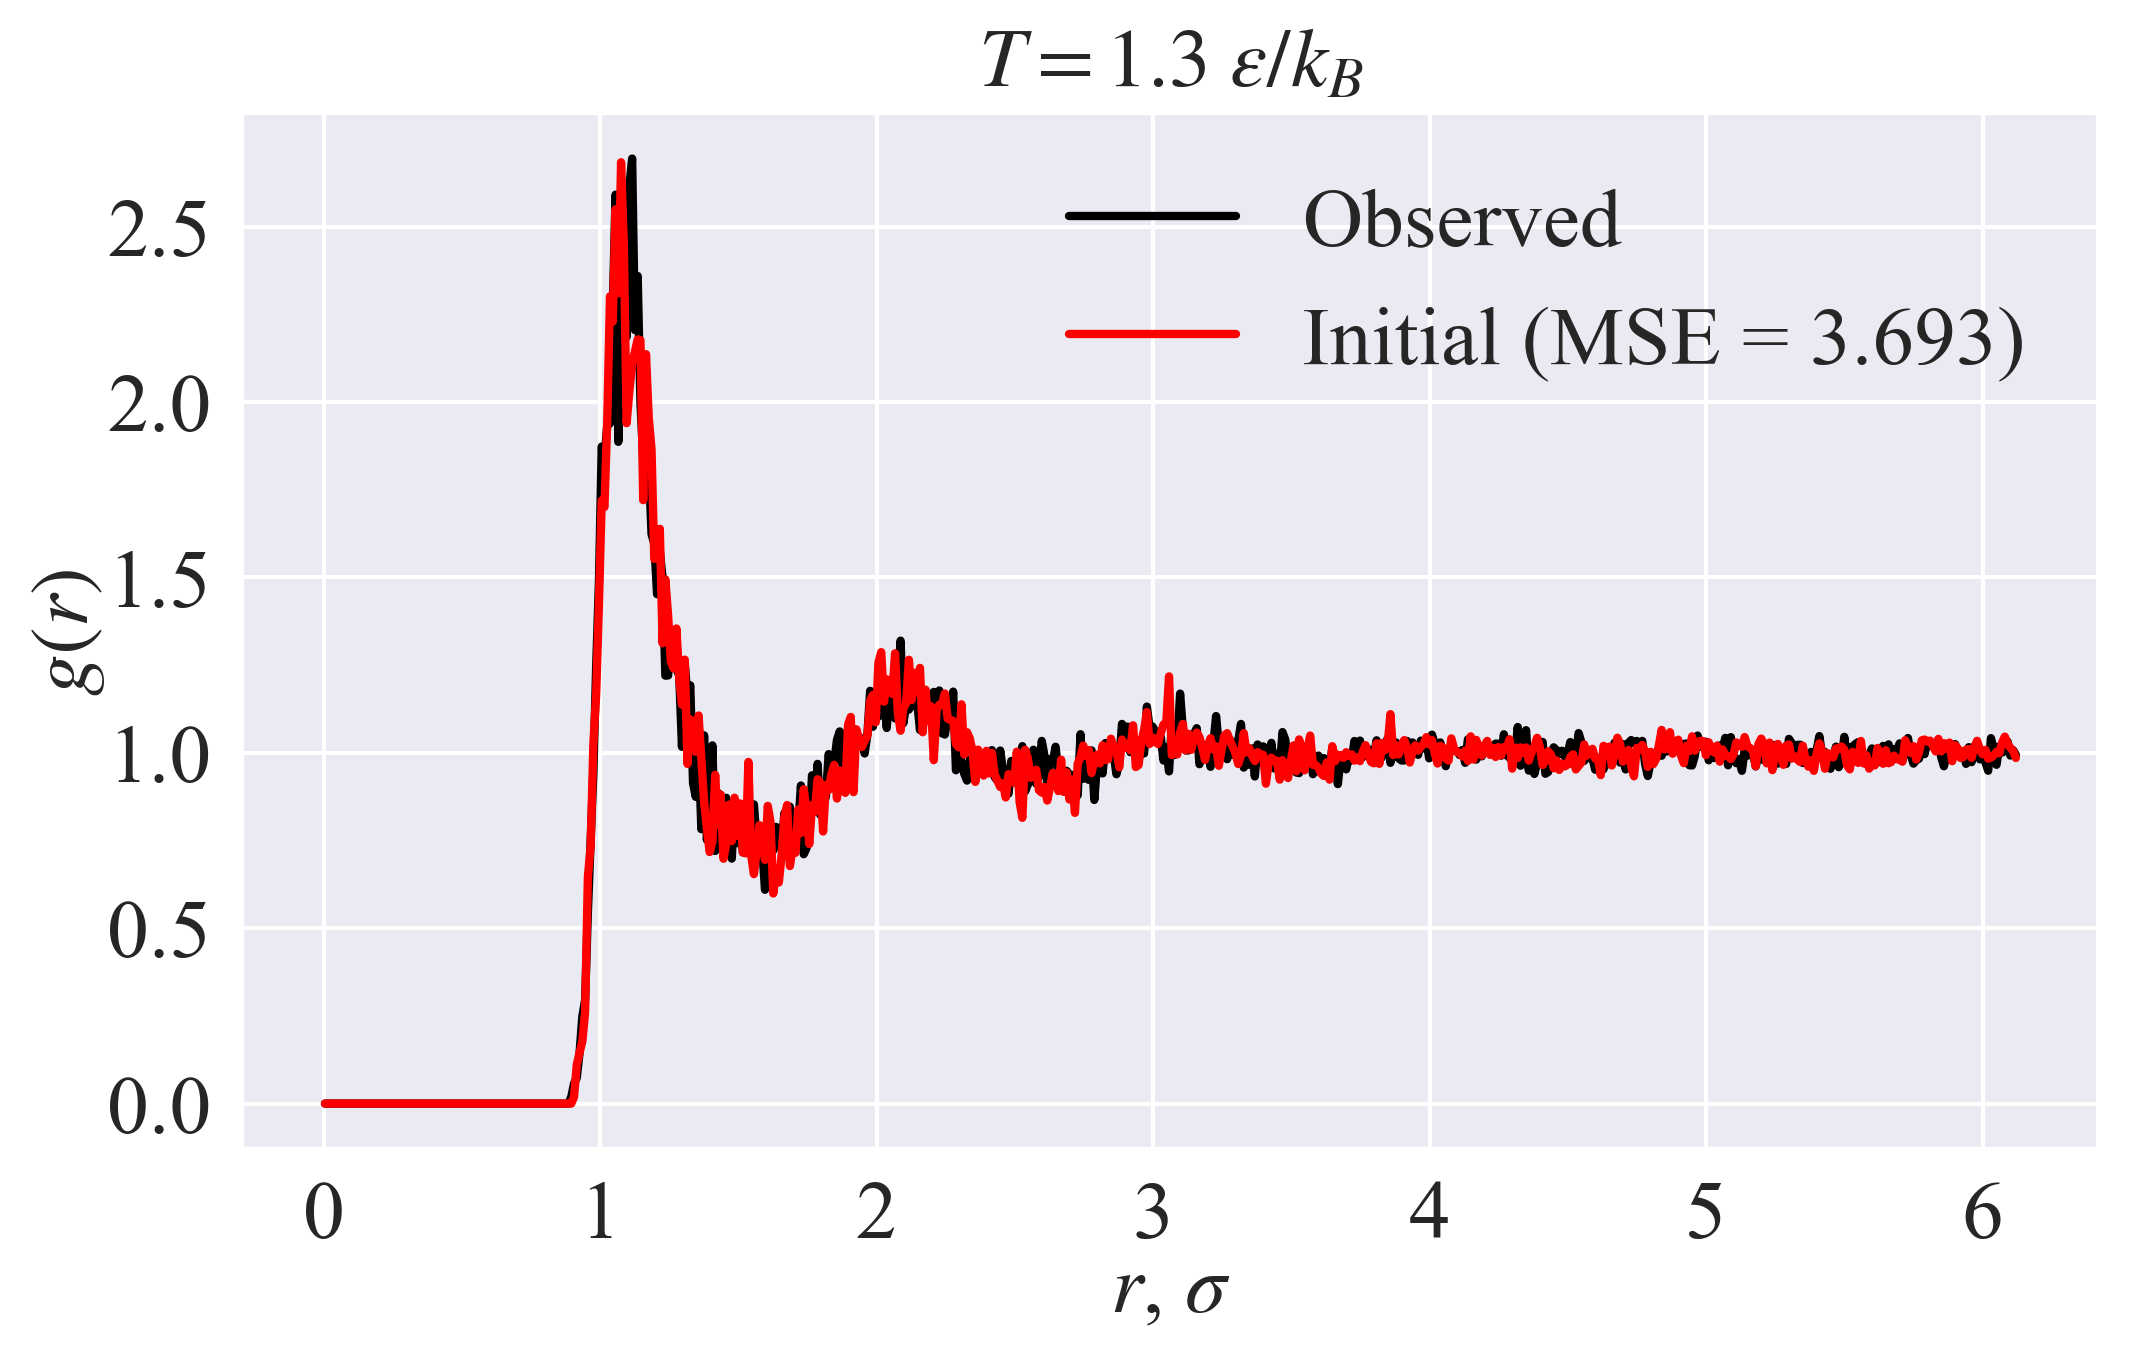

In [31]:
plotter = Plotter(
    path_to_plots=PATH_TO_PLOTS,
    labels=('radius', 'rdf'),
    size=(8, 4.5)
)
plotter.ax.plot(radii, obs_rdf, color='black', label='Observed')
plotter.ax.plot(radii, initial_rdf, color='red', label=f'Initial (MSE = {mse(obs=obs_rdf, exp=initial_rdf):.3f})')
# plotter.ax.plot(radii, rdf_rmo, color='green', label=f'After RMO (MSE = {mse(obs=obs_rdf, exp=rdf_rmo):.3f})')
# plotter.ax.plot(radii, rdf_hj_rmo, color='blue', label=f'After HJ (MSE = {mse(obs=obs_rdf, exp=rdf_hj_rmo):.3f})')
plotter.set_title(fr'$T=1.3~\varepsilon/k_B$')
plotter.get_legend()
plotter.save_plot('plot_initial.png')
plt.show()

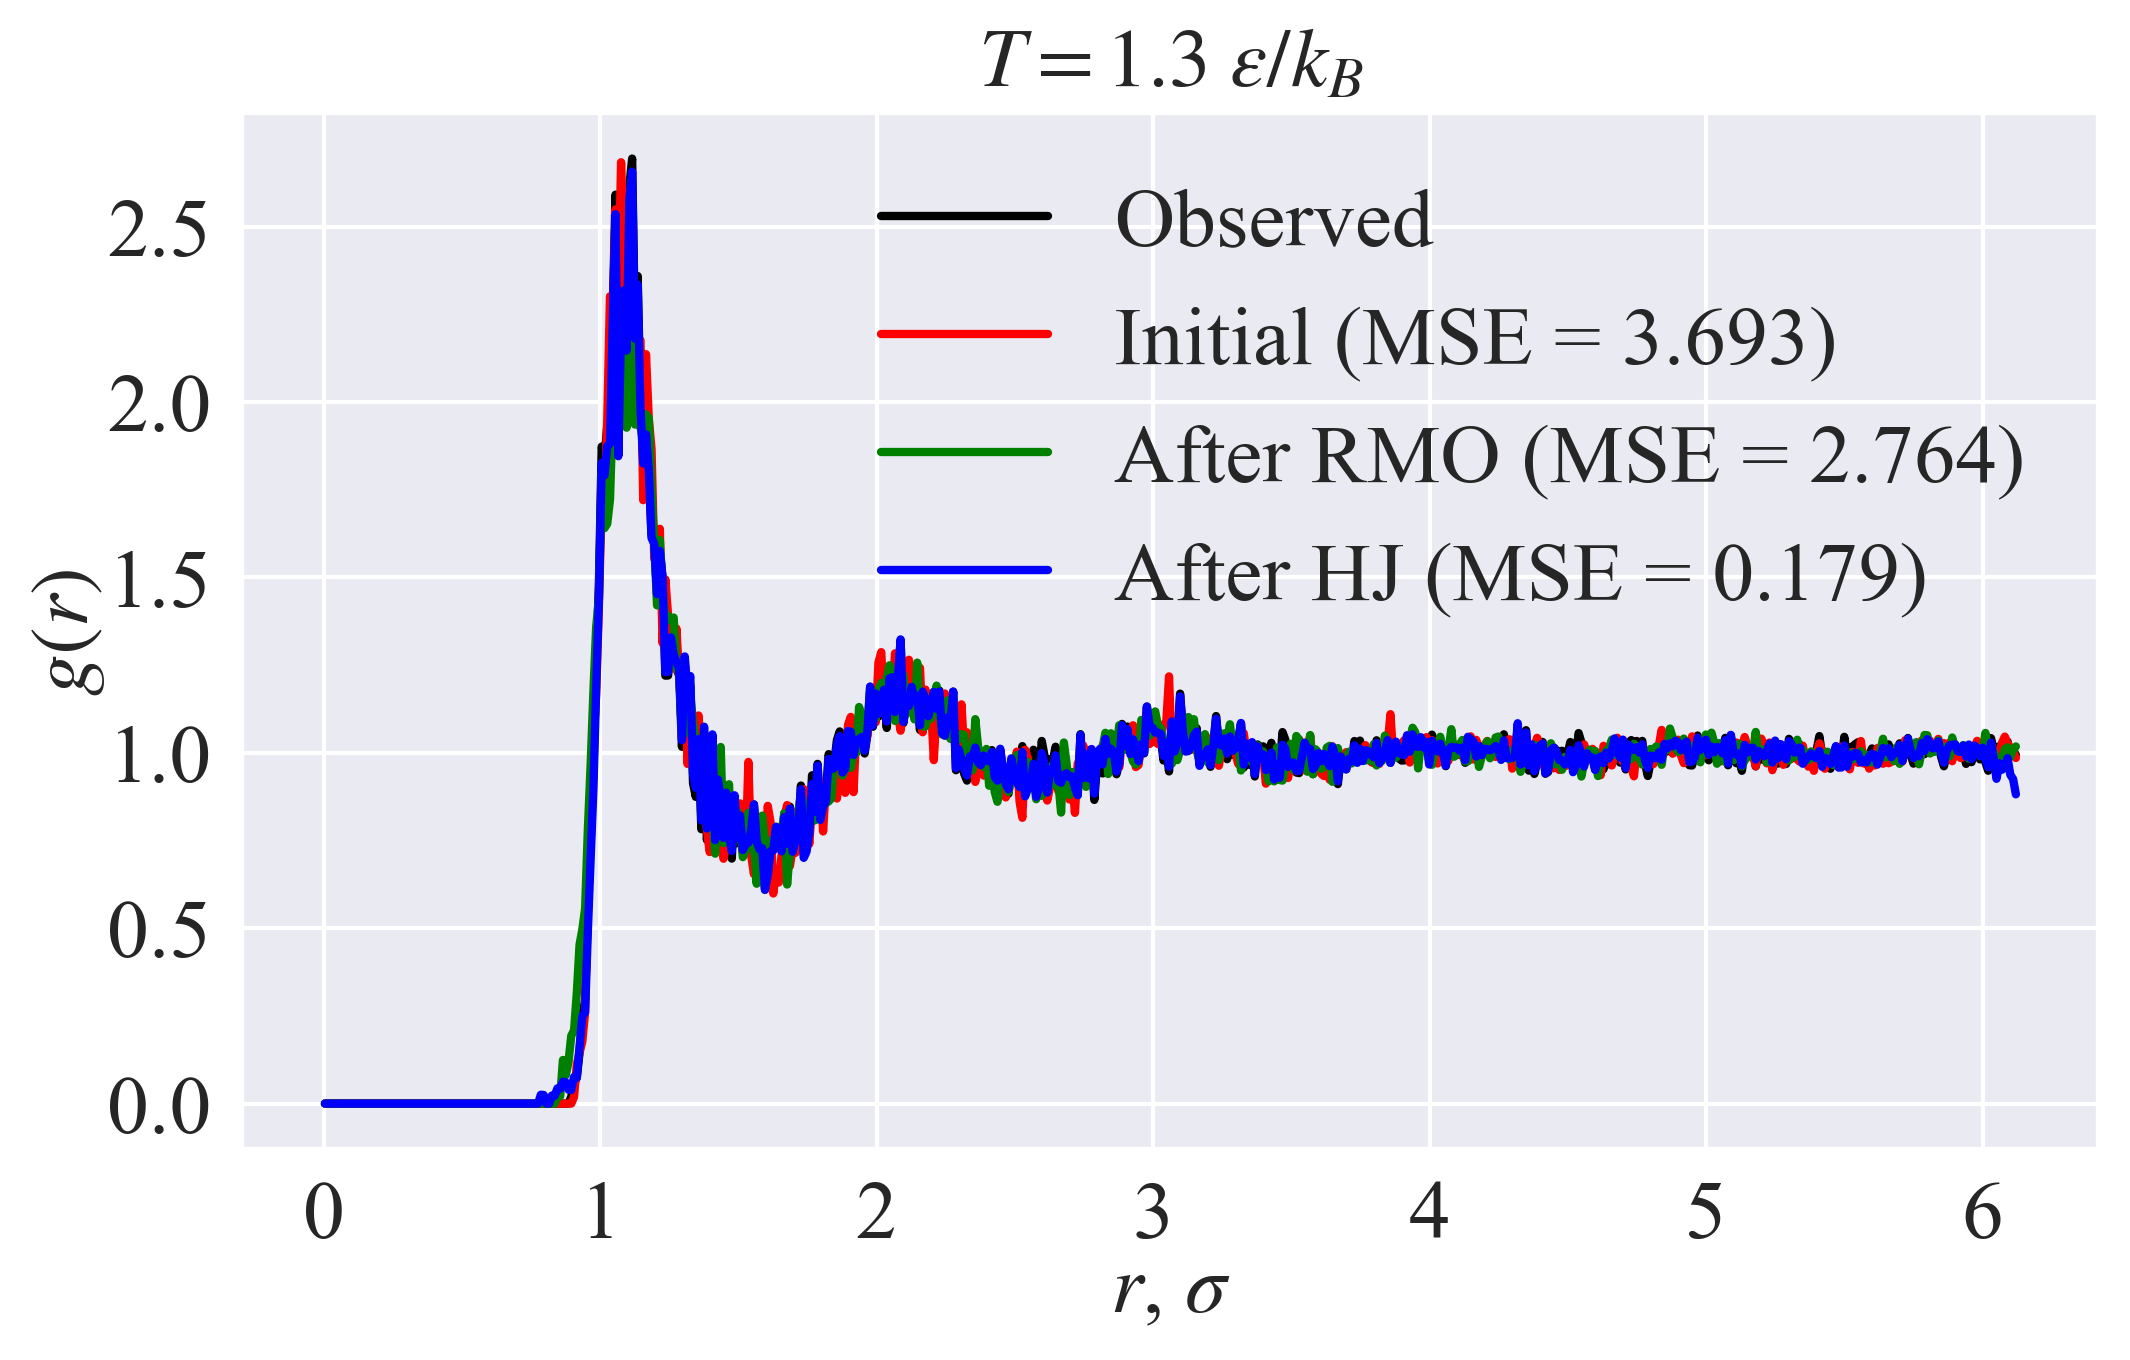

In [32]:
plotter = Plotter(
    path_to_plots=PATH_TO_PLOTS,
    labels=('radius', 'rdf'),
    size=(8, 4.5)
)
plotter.ax.plot(radii, obs_rdf, color='black', label='Observed')
plotter.ax.plot(radii, initial_rdf, color='red', label=f'Initial (MSE = {mse(obs=obs_rdf, exp=initial_rdf):.3f})')
plotter.ax.plot(radii, rdf_rmo, color='green', label=f'After RMO (MSE = {mse(obs=obs_rdf, exp=rdf_rmo):.3f})')
plotter.ax.plot(radii, rdf_hj_rmo, color='blue', label=f'After HJ (MSE = {mse(obs=obs_rdf, exp=rdf_hj_rmo):.3f})')
plotter.set_title(fr'$T=1.3~\varepsilon/k_B$')
plotter.get_legend()
plotter.save_plot('plot_optimized_rmo_hj.png')
plt.show()

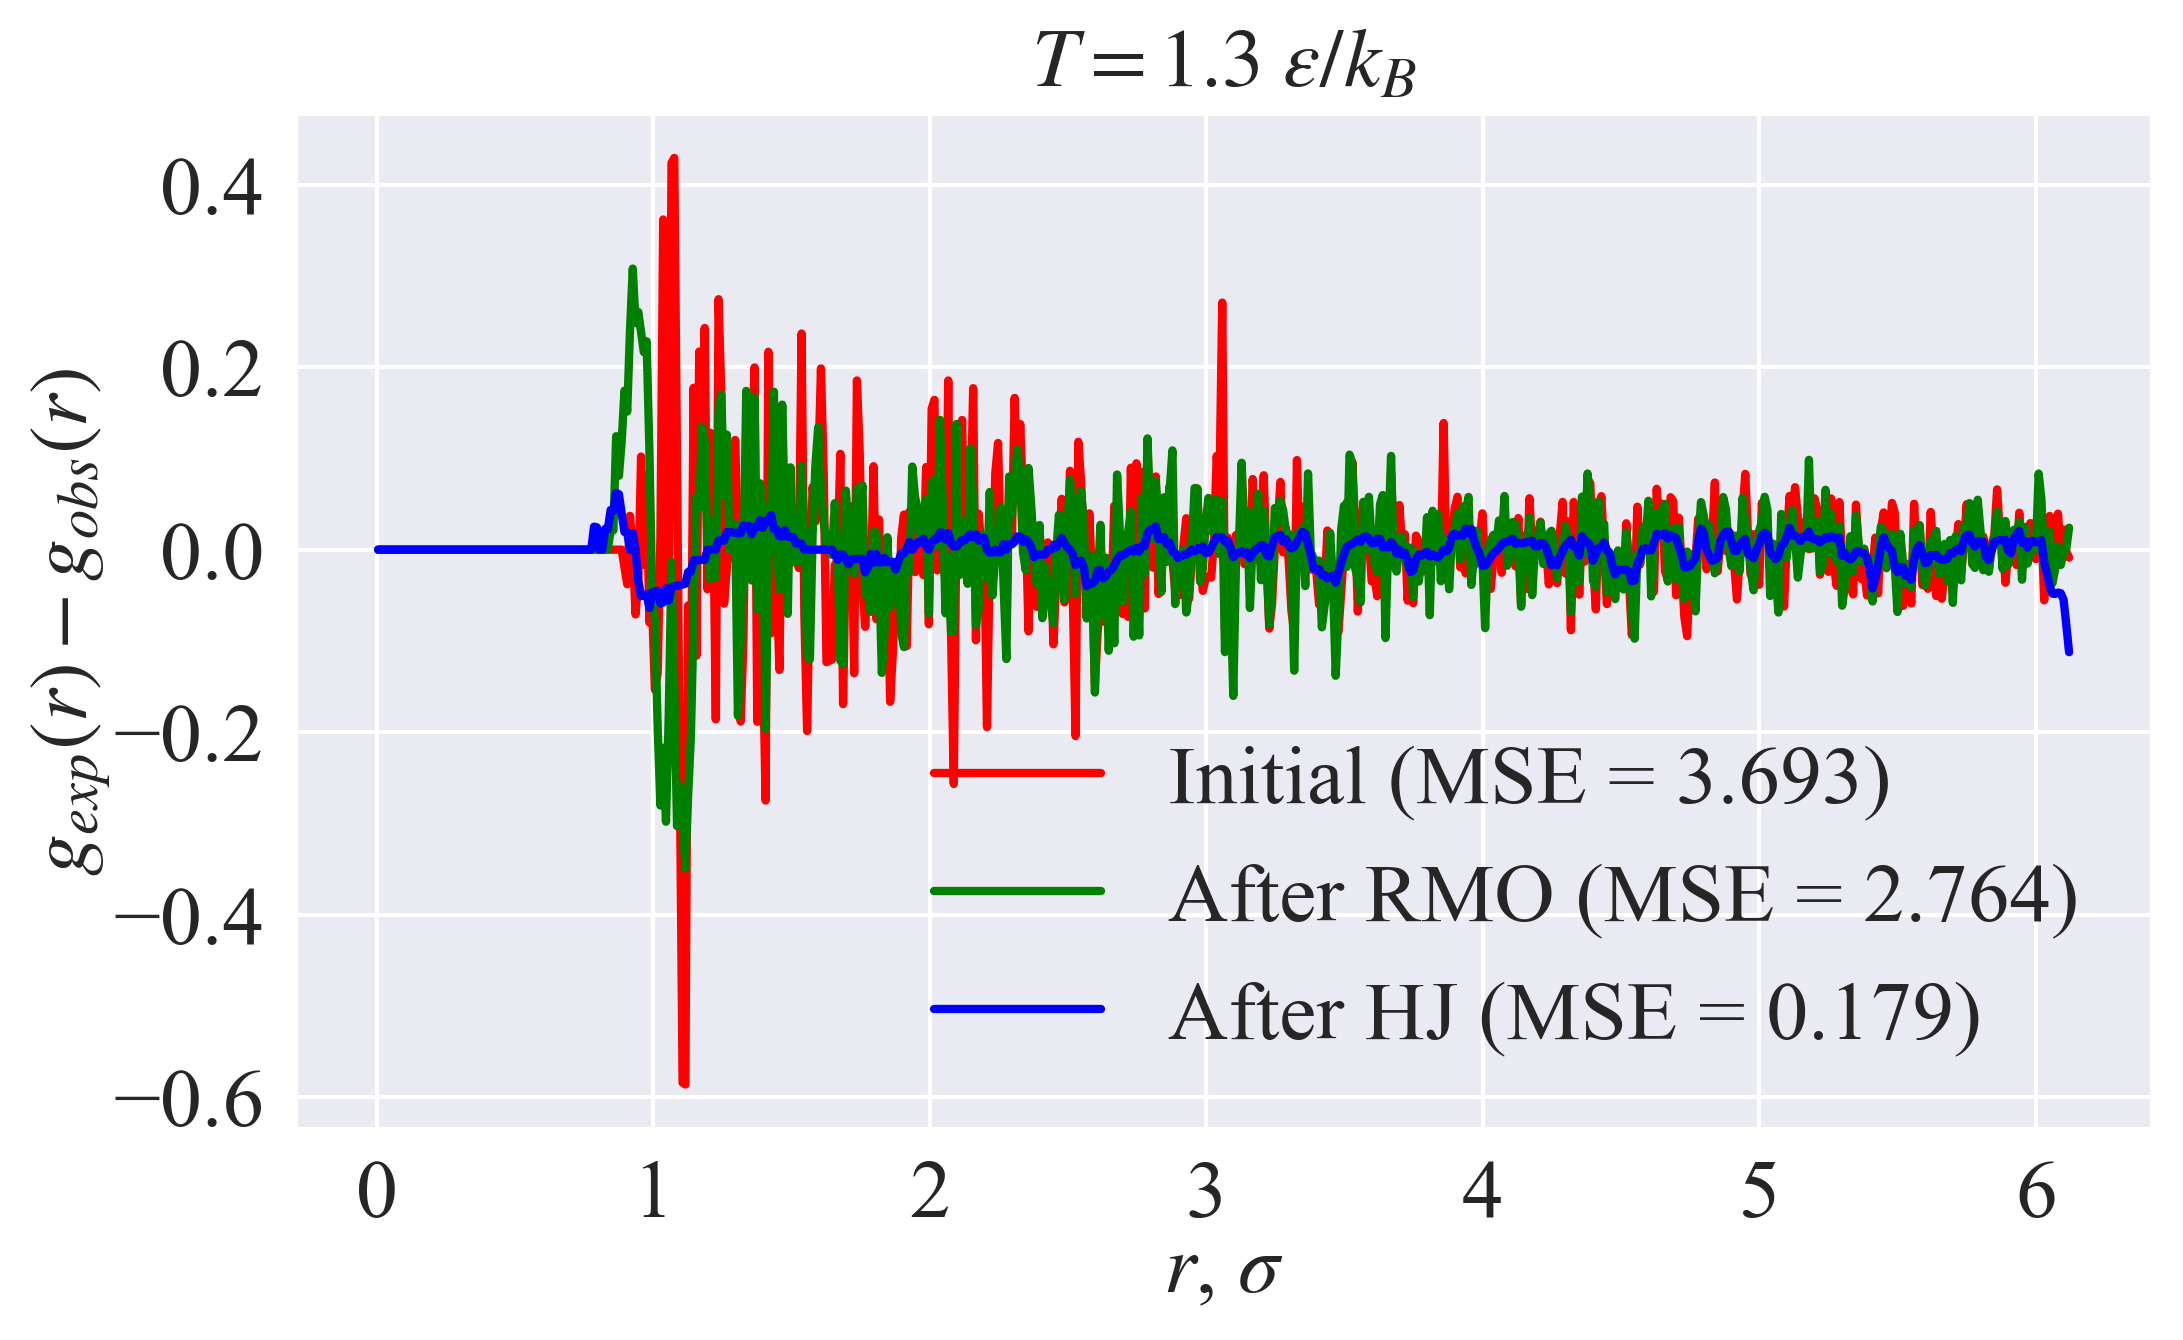

In [12]:
plotter = Plotter(
    path_to_plots=PATH_TO_PLOTS,
    labels=('radius', r'$g_{exp}(r)-g_{obs}(r)$'),
    size=(8, 4.5)
)
plotter.ax.plot(radii, initial_rdf - obs_rdf, color='red', label=f'Initial (MSE = {mse(obs=obs_rdf, exp=initial_rdf):.3f})')
plotter.ax.plot(radii, rdf_rmo - obs_rdf, color='green', label=f'After RMO (MSE = {mse(obs=obs_rdf, exp=rdf_rmo):.3f})')
plotter.ax.plot(radii, rdf_hj_rmo - obs_rdf, color='blue', label=f'After HJ (MSE = {mse(obs=obs_rdf, exp=rdf_hj_rmo):.3f})')
plotter.set_title(fr'$T=1.3~\varepsilon/k_B$')
plotter.get_legend()
plotter.save_plot('plot_residual_optimized_rmo_hj.png')
plt.show()

NameError: name 'radii' is not defined

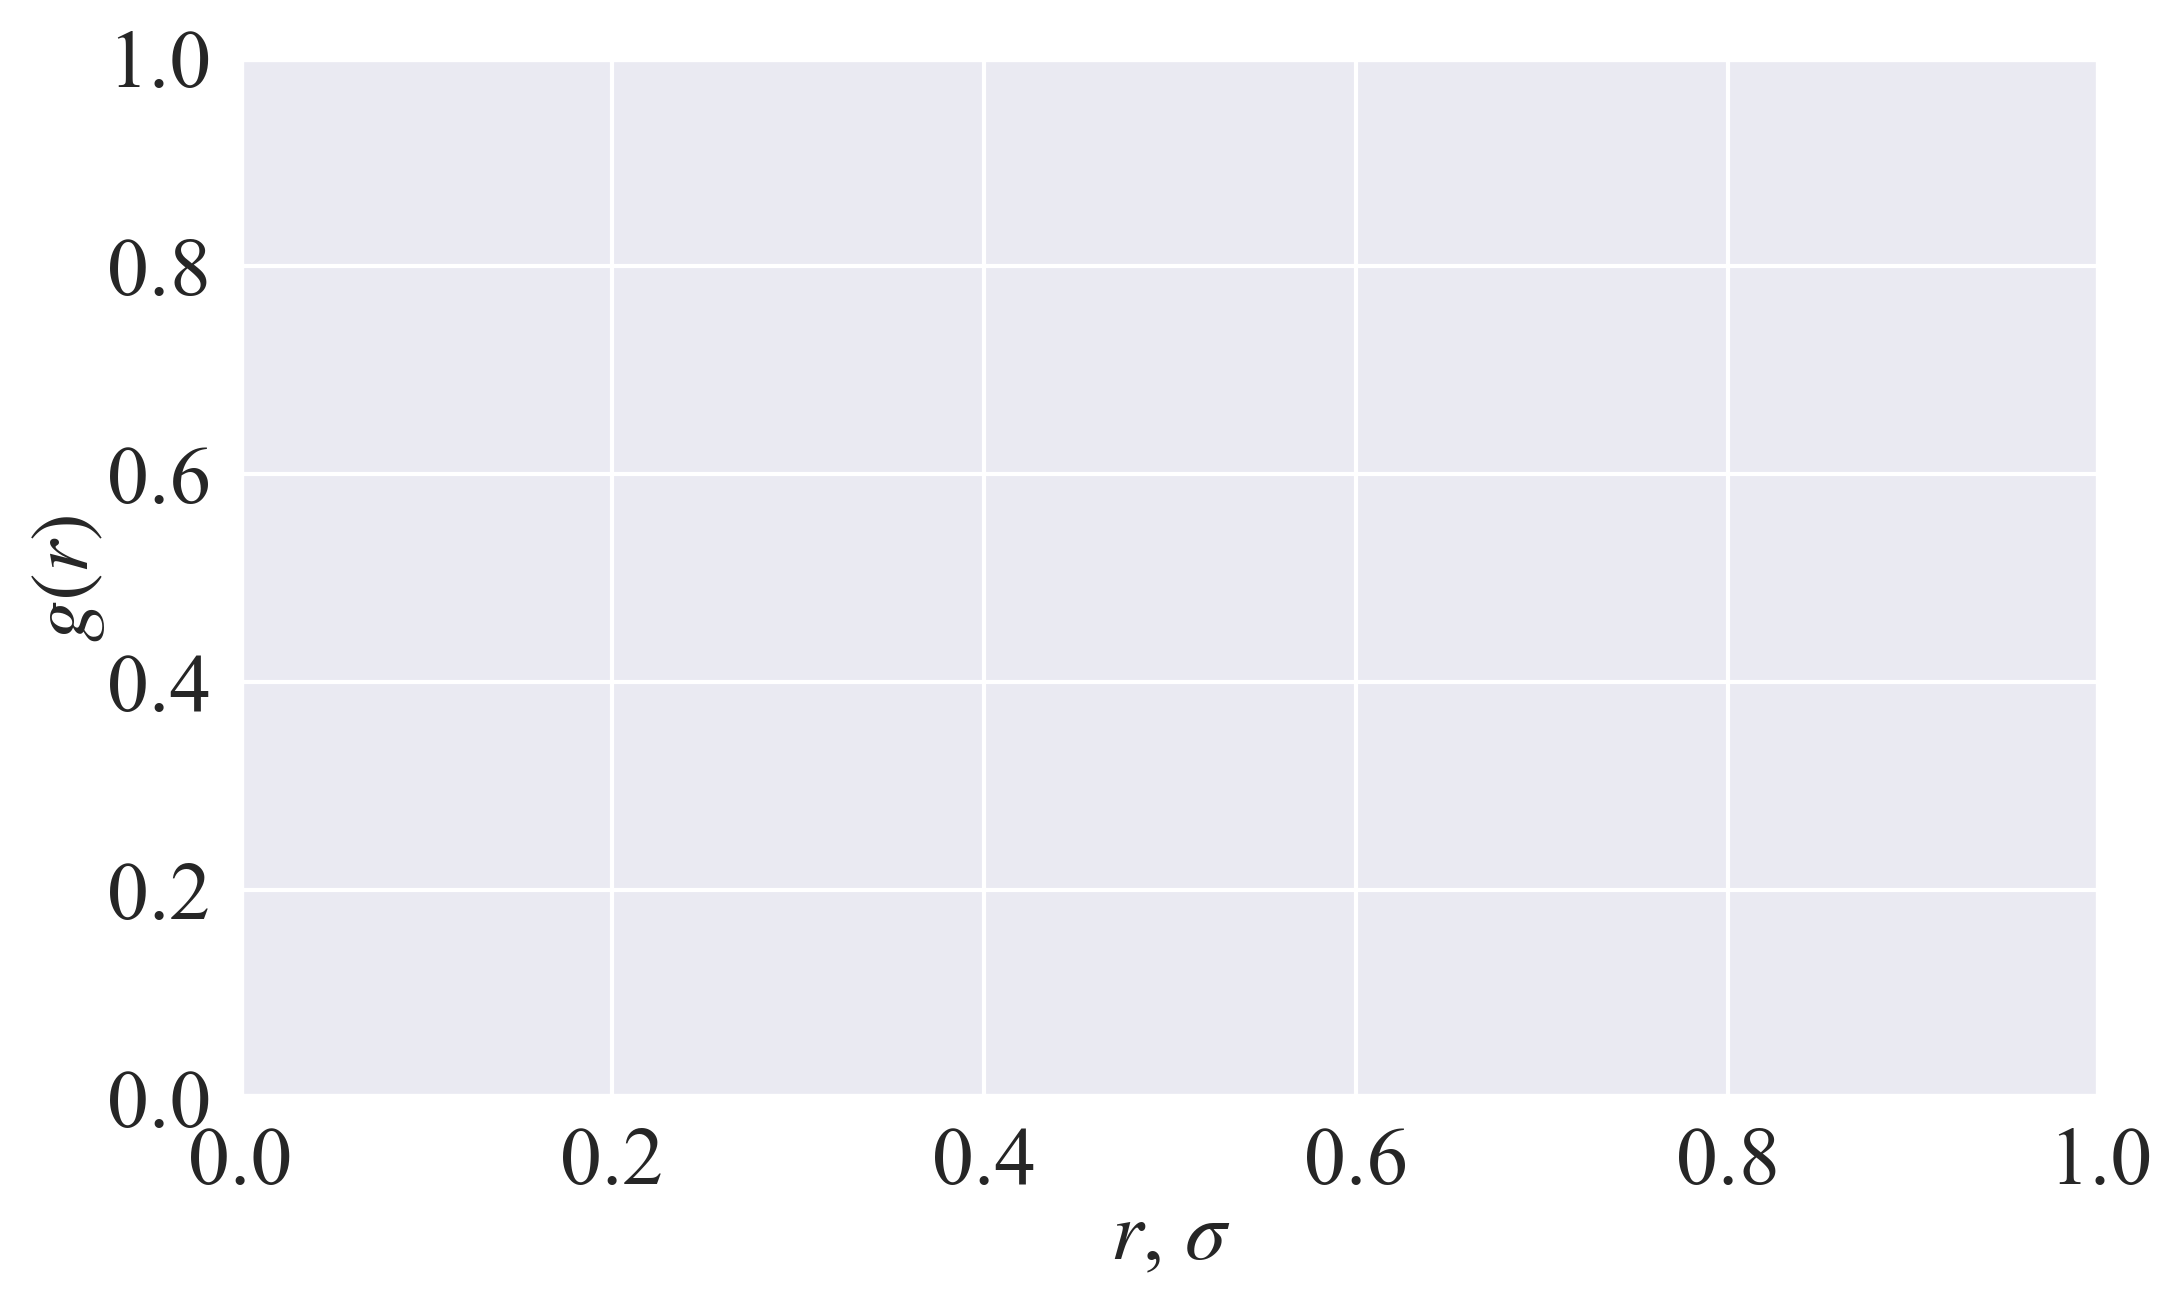

In [17]:
plotter = Plotter(
    path_to_plots=PATH_TO_PLOTS,
    labels=('radius', 'rdf'),
    size=(8, 4.5)
)
plotter.ax.plot(radii, obs_rdf, color='black', label='Observed')
plotter.ax.plot(radii, initial_rdf, color='red', label=f'Initial (MSE = {mse(obs=obs_rdf, exp=initial_rdf):.3f})')
# plotter.ax.plot(radii, rdf_hj, color='green', label=f'After HJ (MSE = {mse(obs=obs_rdf_hj, exp=rdf_hj):.3f})')
plotter.set_title(fr'$T=1.3~\varepsilon/k_B$')
plotter.get_legend()
plotter.save_plot('plot_optimized_hj.png')
plt.show()

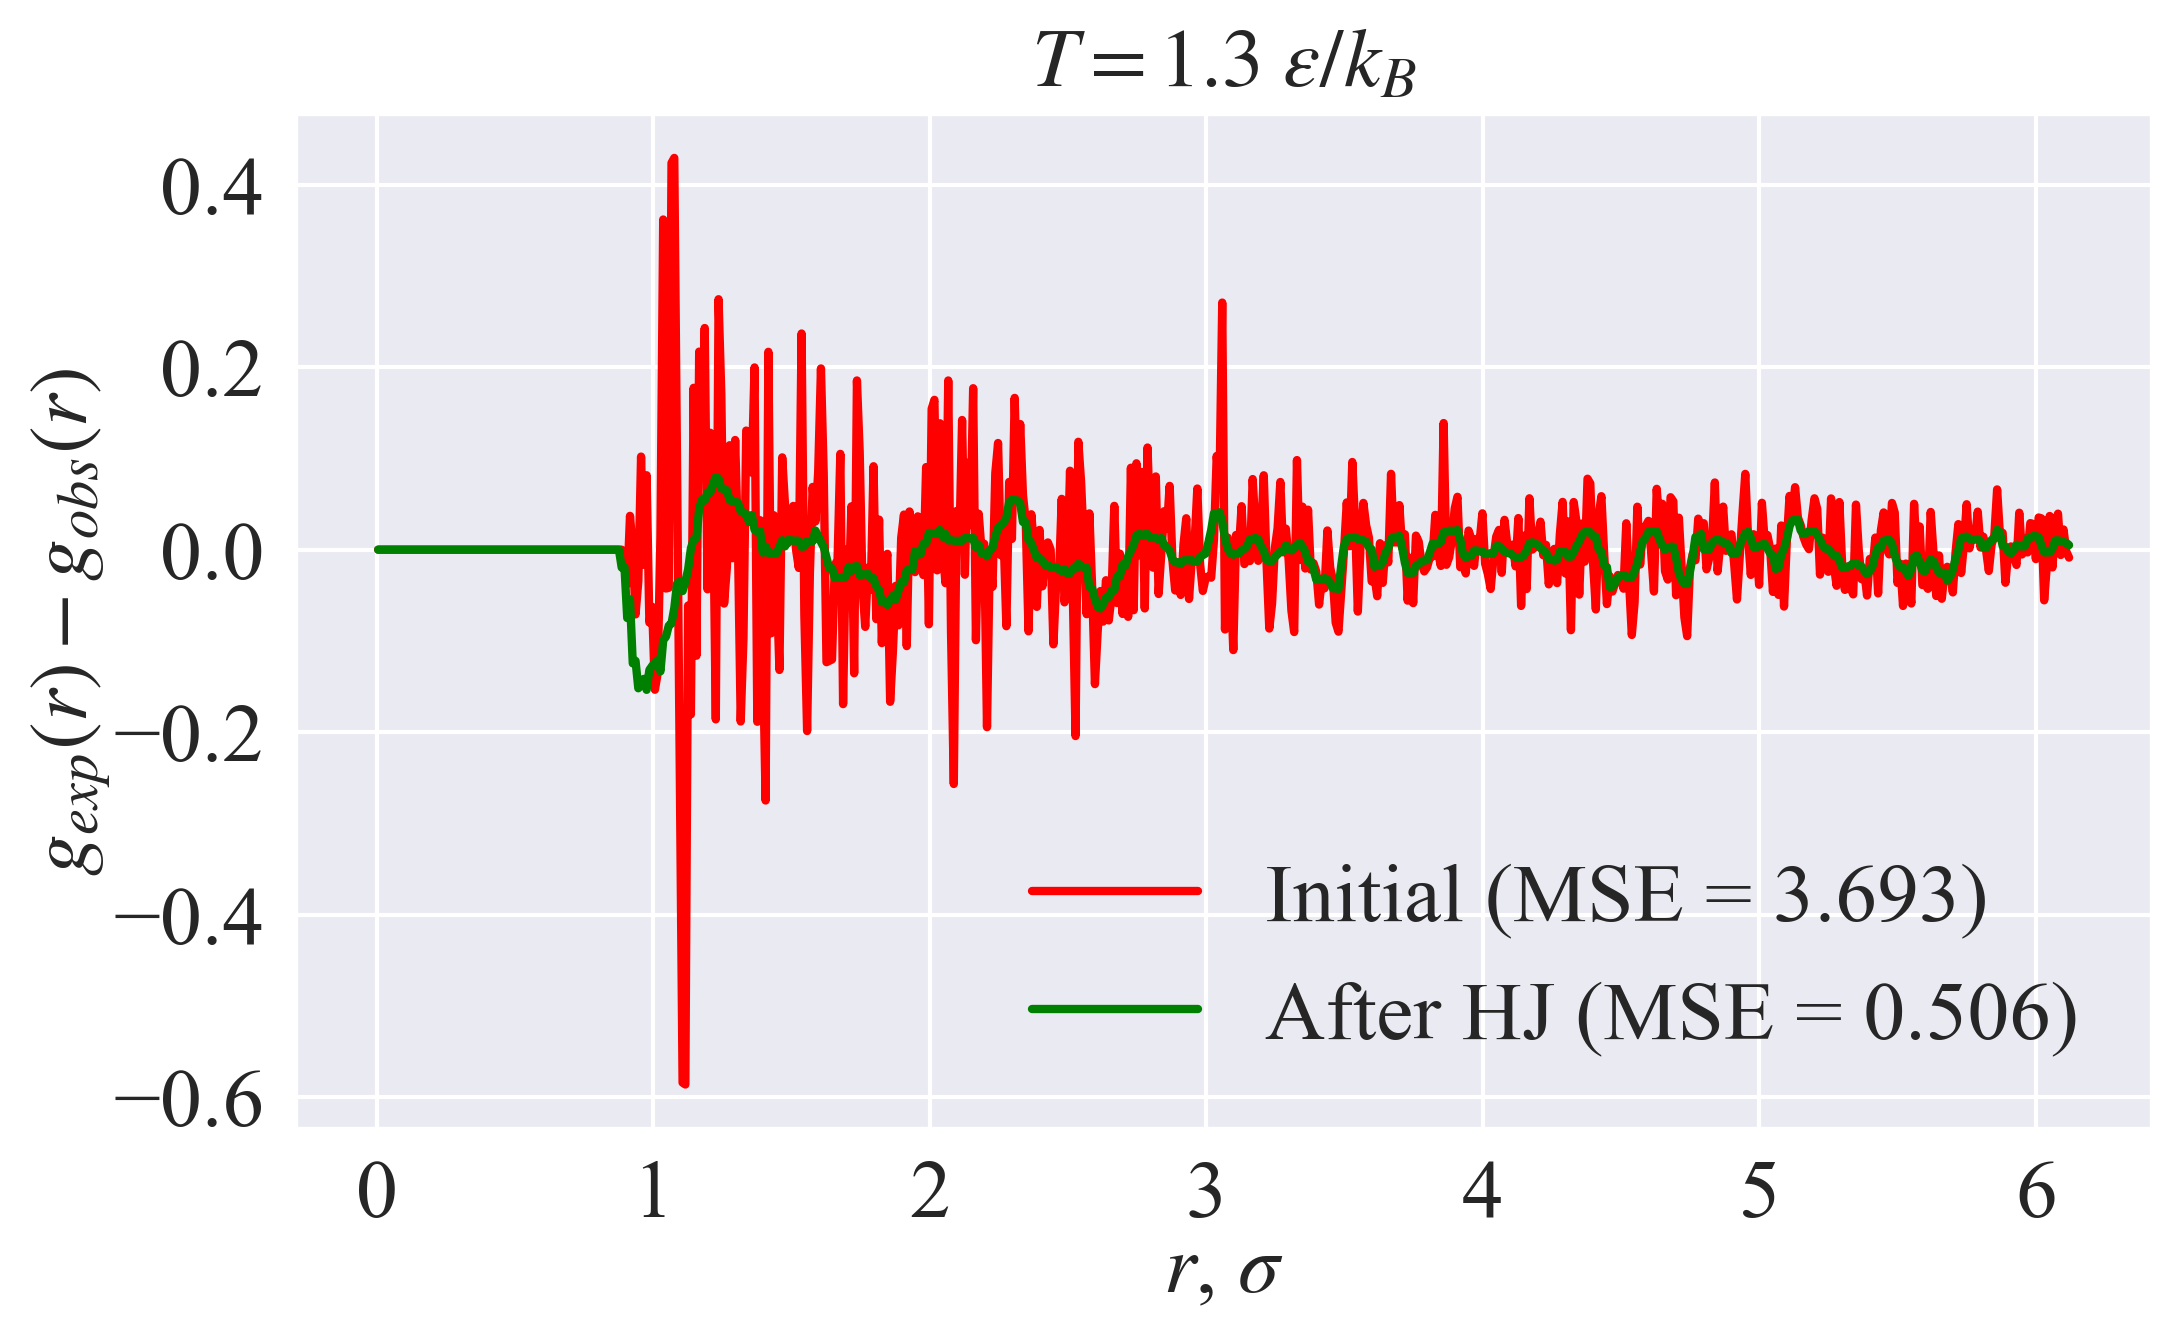

In [14]:
plotter = Plotter(
    path_to_plots=PATH_TO_PLOTS,
    labels=('radius', r'$g_{exp}(r)-g_{obs}(r)$'),
    size=(8, 4.5)
)
plotter.ax.plot(radii, initial_rdf - obs_rdf, color='red', label=f'Initial (MSE = {mse(obs=obs_rdf, exp=initial_rdf):.3f})')
plotter.ax.plot(radii, rdf_hj - obs_rdf_hj, color='green', label=f'After HJ (MSE = {mse(obs=obs_rdf_hj, exp=rdf_hj):.3f})')
plotter.set_title(fr'$T=1.3~\varepsilon/k_B$')
plotter.get_legend()
plotter.save_plot('plot_residual_optimized_hj.png')
plt.show()